In [2]:
from timeit import default_timer
start = default_timer()
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt

In [3]:
st = default_timer()
moviesCSV = pd.read_csv("movies.csv")
moviesCSV.sort_values(by='movieId', inplace=True)
moviesCSV.reset_index(inplace=True, drop=True)
#moviesCSV.head()

In [4]:
st = default_timer()
moviesCSV['year'] =  moviesCSV.title.str.extract("\((\d{4})\)", expand=True)
moviesCSV.year = pd.to_datetime(moviesCSV.year, format='%Y')
moviesCSV.year = moviesCSV.year.dt.year
moviesCSV.title = moviesCSV.title.str[:-7]
moviesCSV.head() 

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


Elapsed time(sec):  486.42
Number of movies Null values:  13


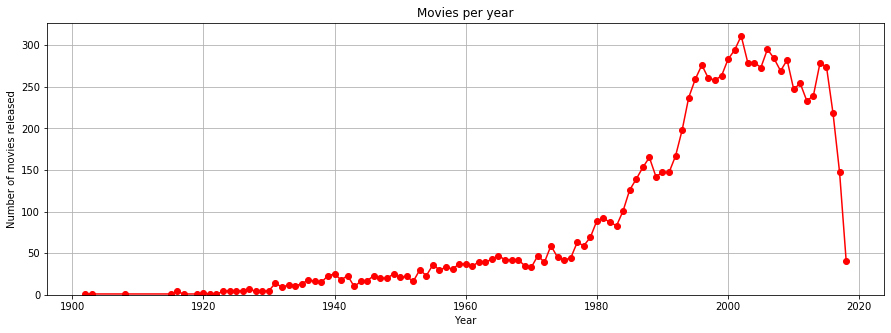

In [53]:
runtime = default_timer() - st
print ("Elapsed time(sec): ", round(runtime,2))
print ("Number of movies Null values: ", max(moviesCSV.isnull().sum()))
#ratingsCSV.dropna(inplace=True)
#moviesCSV.dropna(inplace=True)
moviesCSV.sort_values(by='movieId', inplace=True)
moviesCSV.reset_index(inplace=True, drop=True)
 

combined_data = moviesCSV[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(combined_data.year.first(), combined_data.movieId.nunique(), "r-o")
ax1.set_ylim(0,)
ax1.grid(None)


ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released');
plt.title('Movies per year')
plt.show()


